In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c digit-recognizer
!unzip digit-recognizer.zip

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [9]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print("Eğitim verisi şekli:", train_data.shape)
print("Test verisi şekli:", test_data.shape)

Eğitim verisi şekli: (42000, 785)
Test verisi şekli: (28000, 784)


In [11]:
X = train_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  # Normalizasyon
y = to_categorical(train_data['label'], num_classes=10)

In [12]:
X_test = test_data.values.reshape(-1, 28, 28, 1) / 255.0

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  ])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=32)

Epoch 1/3
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - accuracy: 0.9719 - loss: 0.0883 - val_accuracy: 0.9864 - val_loss: 0.0433
Epoch 2/3
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9817 - loss: 0.0635 - val_accuracy: 0.9875 - val_loss: 0.0399
Epoch 3/3
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 33ms/step - accuracy: 0.9855 - loss: 0.0458 - val_accuracy: 0.9867 - val_loss: 0.0437


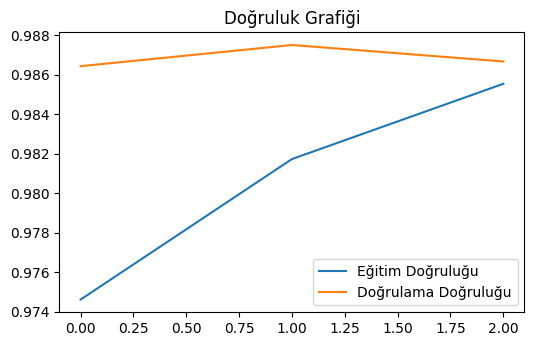

In [30]:
plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title('Doğruluk Grafiği')

plt.show()

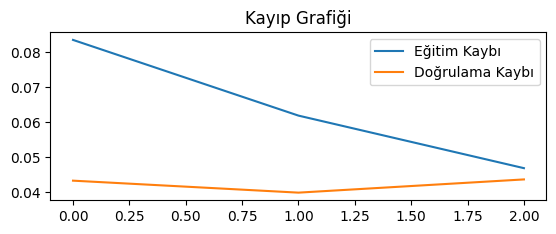

In [32]:
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.title('Kayıp Grafiği')
plt.show()

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


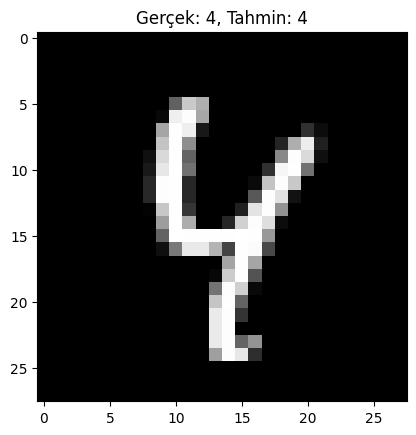

In [37]:
import numpy as np

# Test seti üzerinde tahmin yap
predictions = model.predict(X_test)

# Rastgele bir örneği seç ve sonucu gör
index = np.random.randint(0, len(X_test))
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')



# Seçenek 1: Yalnızca tahmini göster
plt.title(f"Tahmin: {np.argmax(predictions[index])}")

# Seçenek 2: Karşılaştırma için doğrulama setini kullan
index = np.random.randint(0, len(X_val))
plt.imshow(X_val[index].reshape(28, 28), cmap='gray')
plt.title(f"Gerçek: {np.argmax(y_val[index])}, Tahmin: {np.argmax(model.predict(X_val[index].reshape(1, 28, 28, 1))[0])}")

plt.show()

875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


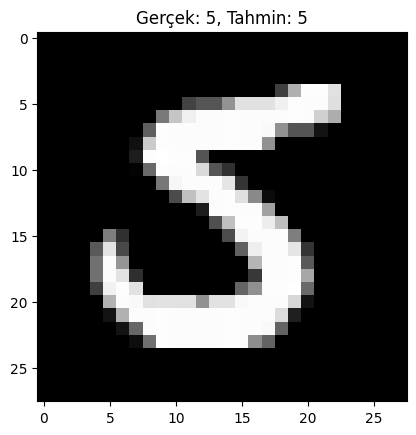

In [38]:
import numpy as np

# Test seti üzerinde tahmin yap
predictions = model.predict(X_test)

# Rastgele bir örneği seç ve sonucu gör
index = np.random.randint(0, len(X_test))
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')



# Seçenek 1: Yalnızca tahmini göster
plt.title(f"Tahmin: {np.argmax(predictions[index])}")

# Seçenek 2: Karşılaştırma için doğrulama setini kullan
index = np.random.randint(0, len(X_val))
plt.imshow(X_val[index].reshape(28, 28), cmap='gray')
plt.title(f"Gerçek: {np.argmax(y_val[index])}, Tahmin: {np.argmax(model.predict(X_val[index].reshape(1, 28, 28, 1))[0])}")

plt.show()

875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


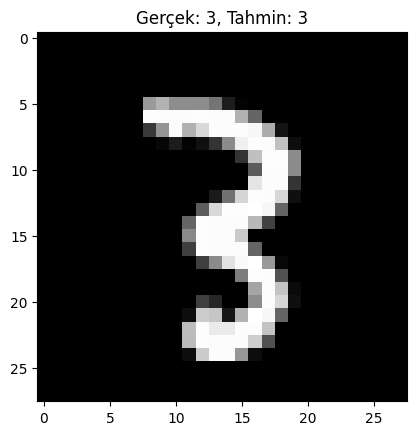

In [41]:
import numpy as np

# Test seti üzerinde tahmin yap
predictions = model.predict(X_test)

# Rastgele bir örneği seç ve sonucu gör
index = np.random.randint(0, len(X_test))
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')



# Seçenek 1: Yalnızca tahmini göster
plt.title(f"Tahmin: {np.argmax(predictions[index])}")

# Seçenek 2: Karşılaştırma için doğrulama setini kullan
index = np.random.randint(0, len(X_val))
plt.imshow(X_val[index].reshape(28, 28), cmap='gray')
plt.title(f"Gerçek: {np.argmax(y_val[index])}, Tahmin: {np.argmax(model.predict(X_val[index].reshape(1, 28, 28, 1))[0])}")

plt.show()